In [ ]:
# ME 781 Project
# Group 1
# Shiv Modi [19D100011]
# Jatin Choudhary [19D170010]
# Abhijeet Singh [215120039]
# Pratik Khokle [19D110012]


In [ ]:
## Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib
from IPython.display import Image
from matplotlib import pyplot as plt
import seaborn as sns
import io



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## Uploading the dataset, upload the .csv file attached with submission folder
from google.colab import files
uploaded = files.upload()

Saving train_dataset.csv to train_dataset.csv


In [ ]:
## Loading the Dataset


df = pd.read_csv(io.BytesIO(uploaded['train_dataset.csv']))


In [ ]:
## studying the dataset
df.describe()
df.info()

In [ ]:
## Finding total null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
## Replacing null values with mean value
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
## Replacing null values for CATERGORIAL TERMS
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [ ]:
## Confirming no null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
## Total income can be a better parameter than Applicant and Co-Applicant Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']


In [ ]:
# Apply log transformation to the attribute for ease of use
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
df['Total_Income_Log'] = np.log(df['Total_Income'])
df['LoanAmountLog'] = np.log(df['LoanAmount'])

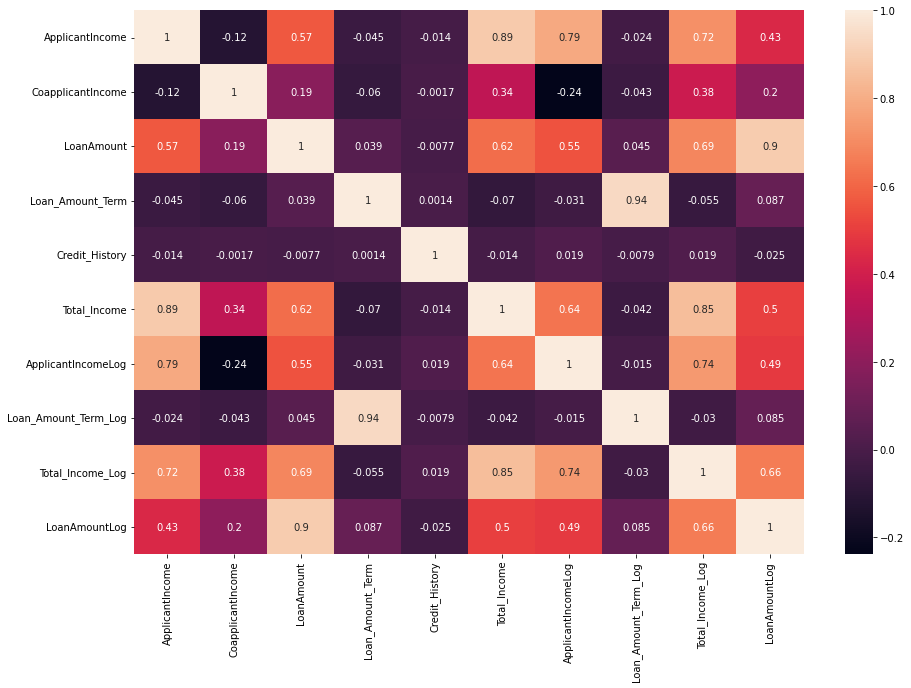

In [ ]:
## Getting correlation between different predictors
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

In [ ]:
## Dropping unnecessary columns
cols = ['CoapplicantIncome','Loan_ID','Total_Income','ApplicantIncome','LoanAmount','Loan_Amount_Term']
df = df.drop(columns=cols,axis=1)
df.head()

In [ ]:
## Label Encoding for Categorial Data
df['Gender'].value_counts()
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})
df['Married'].value_counts()
df['Married'] = df['Married'].replace({'Yes':1, 'No':0})
df['Dependents'].value_counts()
df['Dependents'] = df['Dependents'].replace({'0':0, '1':1, '2':2, '3+':3})
df['Education'].value_counts()
df['Education'] = df['Education'].replace({'Graduate':1, 'Not Graduate':0})
df['Property_Area'].value_counts()
df['Property_Area'] = df['Property_Area'].replace({'Urban':2, 'Semiurban':1, 'Rural':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1, 'No':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Loan_Amount_Term_Log,Total_Income_Log,LoanAmountLog
0,1,0,0,1,0,1.0,2,1,8.674026,5.886104,8.674026,4.986426
1,1,1,1,1,0,1.0,0,0,8.430109,5.886104,8.714568,4.852030
2,1,1,0,1,1,1.0,2,1,8.006368,5.886104,8.006368,4.189655
3,1,1,0,0,0,1.0,2,1,7.856707,5.886104,8.505323,4.787492
4,1,0,0,1,0,1.0,2,1,8.699515,5.886104,8.699515,4.948760


In [ ]:
## Specifing input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
## MODEL TRAINING          
## Classify function
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy on test set is", model.score(x_test, y_test)*100)
    print("Accuracy on train set is", model.score(x_train,y_train)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x , y , cv=5)
    print("Cross validation is",np.mean(score)*100)

In [ ]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x , y)

Accuracy on test set is 78.86178861788618
Accuracy on train set is 81.4663951120163
Cross validation is 80.9462881514061


In [ ]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy on test set is 77.23577235772358
Accuracy on train set is 100.0
Cross validation is 78.17806210848993


In [ ]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy on test set is 69.10569105691057
Accuracy on train set is 100.0
Cross validation is 71.49940023990403


In [ ]:
## Gradient Boosting Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
#---
#Hyperparameters

## Running this cell can take long time, put n_splits = 2 for faster result (2-3 minutes)

num_estimators = [250, 500, 750]
learn_rates = [0.05, 0.075,  0.1]
max_depths = [3, 4, 5]
min_samples_leaf = [2, 3]
min_samples_split = [2, 5, 7]
#---
param_grid = {'n_estimators': num_estimators, 'learning_rate': learn_rates, 'max_depth': max_depths, 'min_samples_leaf': min_samples_leaf,'min_samples_split': min_samples_split}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, n_jobs=2)
grid_result = grid.fit(x,y)

In [ ]:
grid.score(x,y)

0.9429967426710097

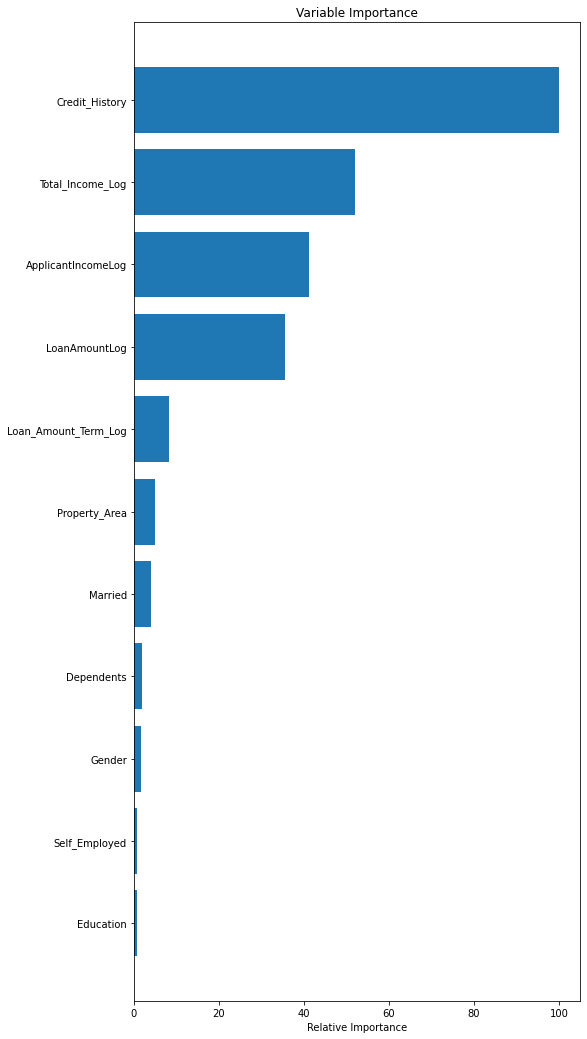

In [ ]:
feature_importance = grid.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
i1 = int(input("Applicant Income = "))


Applicant Income = 5000


In [ ]:
i2 = int(input("Co-Applicant Income = "))


Co-Applicant Income = 4000


In [ ]:
i3 = int(input("Loan Amount = "))


Loan Amount = 2000


In [ ]:
i4 = int(input("Loan Term = "))


Loan Term = 5


In [ ]:
i5 = int(input("Property Area (Enter 2 if 'Urban', 1 if 'Semi-Urban', 0 if 'Rural') = "))


Property Area (Enter 2 if 'Urban', 1 if 'Semi-Urban', 0 if 'Rural') = 1


In [ ]:
i6 = int(input("Married (Enter 1 if 'Yes', 0 if 'No')  = "))


Married (Enter 1 if 'Yes', 0 if 'No')  = 1


In [ ]:
i7 = int(input("Gender (Enter 1 if 'Male', 0 if 'Female') = "))


Gender (Enter 1 if 'Male', 0 if 'Female') = 0


In [ ]:
i8 = int(input("Number of Dependents (Enter 0 if 0 Dependents, 1 if 1 Dependent, 2 if 2 Dependents, 3 if 3 or more Dependents) = "))


Number of Dependents (Enter 0 if 0 Dependents, 1 if 1 Dependent, 2 if 2 Dependents, 3 if 3 or more Dependents) = 1


In [ ]:
i9 = int(input("Wether you are self Employed or not? (Enter 1 if 'Yes', 0 if 'No')"))


Wether you are self Employed or not? (Enter 1 if 'Yes', 0 if 'No')0


In [ ]:
i10 = int(input("Education (Enter 1 if 'Graduate', 0 otherwise) = "))


Education (Enter 1 if 'Graduate', 0 otherwise) = 1


In [ ]:
i11 = int(input("Credit History (Enter 1 if no pending loans, 0 otherwise) = "))

Credit History (Enter 1 if no pending loans, 0 otherwise) = 1


In [ ]:
df_test = pd.DataFrame([{'Gender':i7,'Married':i6,'Dependents':i8,'Education':i10,'Self_Employed':i9,'Credit History':i11,'Property_Area':i5,'ApplicantIncomeLog':np.log(i1),'Loan_Amount_Term_Log':np.log(i4),'Total_Income_Log':np.log(i1+i2),'LoanAmountLog':np.log(i3)}])

In [ ]:
result = grid.predict(df_test)

In [ ]:
if result[0]==1: 
  print("Congratulations! Loan Approved")
else:
  print("Not Approved")

In [ ]:
# Upload Yes and No imagings in colab notebook. We have sent in submission folder. Otherwise it will show error.
if result[0]==1: 
  display(Image(url="Yes.jpg", width=400, height=400))
else:
  display(Image(url="No.jpg", width=400, height=400))

Yes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Credit History
Feature names seen at fit time, yet now missing:
- Credit_History

  warnings.warn(message, FutureWarning)
